In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/home/codetrade/Downloads/Social_Network_Ads.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X=data.iloc[:,2:4].values

In [5]:
X.shape

(400, 2)

In [6]:
y=data.iloc[:,-1].values

In [7]:
y.shape

(400,)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
X_train.shape

(320, 2)

In [10]:
X_test.shape

(80, 2)


# Standard scaling

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [12]:
X_train=scaler.fit_transform(X_train)
X_train

array([[ 0.22077584, -0.10734422],
       [ 1.16527139, -1.42064645],
       [ 0.03187672,  0.06776275],
       [ 0.97637228, -1.04124803],
       [-1.29041705, -1.33309297],
       [-0.81816927, -1.1871705 ],
       [-0.25147194, -0.63266511],
       [-0.25147194, -0.31163568],
       [-1.76266483, -1.39146195],
       [-0.62927016, -1.56656892],
       [ 0.88192272, -1.27472398],
       [-1.57376572, -0.01979074],
       [-0.53482061, -1.47901544],
       [-0.06257283,  0.09694724],
       [-1.76266483,  0.03857825],
       [-1.29041705, -1.07043252],
       [ 0.97637228,  2.11067733],
       [-1.10151794, -0.48674264],
       [ 0.88192272, -1.42064645],
       [ 1.3541705 , -0.89532556],
       [ 0.88192272,  2.19823081],
       [ 1.07082183,  2.11067733],
       [ 0.40967495,  2.34415328],
       [ 1.54306961,  1.03085105],
       [ 0.22077584,  0.09694724],
       [ 0.5041245 ,  1.264327  ],
       [ 0.78747317,  0.15531623],
       [ 0.40967495,  0.18450072],
       [ 0.22077584,

In [13]:
X_test=scaler.transform(X_test)
X_test

array([[-0.25147194,  1.14758903],
       [ 1.82641828, -1.04124803],
       [-1.47931616,  0.35960769],
       [ 0.03187672, -0.28245118],
       [ 0.78747317,  0.38879218],
       [-0.53482061,  1.93557036],
       [ 0.97637228, -0.98287904],
       [-0.06257283,  0.15531623],
       [ 0.97637228, -1.12880151],
       [-0.15702239,  1.67290992],
       [-0.25147194,  0.24286971],
       [-0.72371972,  0.53471465],
       [ 0.88192272, -0.63266511],
       [-0.15702239,  1.64372542],
       [-1.00706838, -1.50819993],
       [-0.62927016, -0.31163568],
       [-1.19596749,  0.53471465],
       [ 1.92086783, -1.33309297],
       [-0.91261883,  0.53471465],
       [ 1.16527139, -0.95369454],
       [-0.91261883,  0.44716117],
       [ 1.16527139,  0.56389915],
       [ 1.07082183,  0.15531623],
       [ 0.31522539,  0.06776275],
       [ 0.12632628,  1.55617194],
       [ 0.40967495, -0.45755815],
       [ 0.12632628,  0.06776275],
       [-0.15702239, -0.48674264],
       [ 0.22077584,

In [14]:
# know the k value
np.sqrt(X_train.shape[0])

17.88854381999832

In [15]:
k=17

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [18]:
y_pred=knn.predict(X_test)

In [19]:
y_pred.shape

(80,)

In [20]:
y_test.shape

(80,)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9125

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[46,  5],
       [ 2, 27]])

In [23]:
accuracy=[]
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

In [24]:
print(accuracy)

[0.825, 0.8875, 0.9125, 0.925, 0.9125, 0.9, 0.8875, 0.8875, 0.925, 0.925, 0.925, 0.925, 0.925, 0.9, 0.9, 0.9, 0.9125, 0.9125, 0.9125, 0.8875, 0.9125, 0.9125, 0.9125, 0.9125, 0.9125, 0.9, 0.9, 0.9, 0.9125, 0.9]


In [25]:
accuracy

[0.825,
 0.8875,
 0.9125,
 0.925,
 0.9125,
 0.9,
 0.8875,
 0.8875,
 0.925,
 0.925,
 0.925,
 0.925,
 0.925,
 0.9,
 0.9,
 0.9,
 0.9125,
 0.9125,
 0.9125,
 0.8875,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9125,
 0.9,
 0.9,
 0.9,
 0.9125,
 0.9]

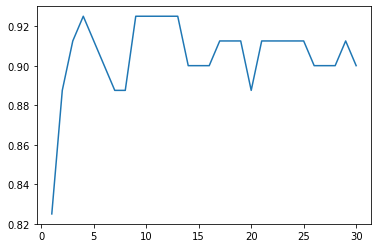

In [26]:
plt.plot(range(1,31),accuracy)

In [27]:
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print('WITH K=15')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=15


[[46  5]
 [ 3 26]]


              precision    recall  f1-score   support

           0       0.94      0.90      0.92        51
           1       0.84      0.90      0.87        29

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



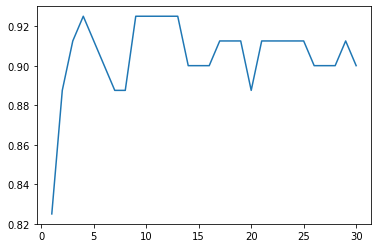

In [28]:
plt.plot(range(1,31),accuracy)

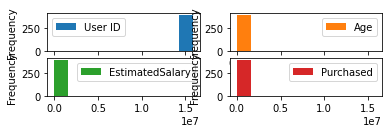

In [29]:
data.plot(kind='hist', bins=10, subplots=True, layout=(5,2), sharex=False, sharey=False)
plt.show()

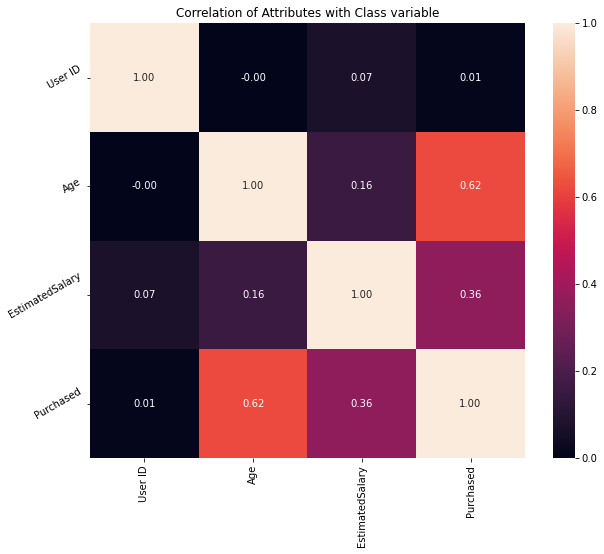

In [30]:
import seaborn as sns
correlation = data.corr()
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

/home/codetrade/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/codetrade/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


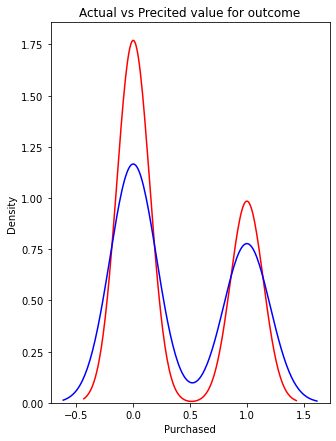

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))
ax = sns.distplot(data['Purchased'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()

In [34]:
from imblearn.over_sampling import SMOTE
from collections import Counter
counter= Counter(y_train)
print('Befor',counter)
smt=SMOTE()
X_train_sm,y_train_sm= smt.fit_resample(X_train,y_train)
counter= Counter(y_train_sm)
print('Befor',counter)

Befor Counter({0: 206, 1: 114})
Befor Counter({0: 206, 1: 206})
